![Zillow-Logo](https://wp.zillowstatic.com/8/ZPA-horizontal-2ac5b0-300x71.png)  

# <center>Predicting Log Error of the Zestimate®</center>

### Author: 
Bethany Thompson, Jr. Data Scientist  
thompson.bethany.01@gmail.com
### Date:
October 21st, 2020
### Project Goals:
Create insight for the current Zillow Zestimate model by predicting the model's log error.
### Conclusions:

## Table of Contents:
 [Acquire](#first-bullet)  
> Use acquire module to assign the data to a variable  

 [Prepare](#second-bullet)  
> Use prepare module to clean the data  

 [Explore](#third-bullet)  
> Highlight key takeaways from explore  

 [Modeling](#fourth-bullet)  
> Creating 4 models to predict log error and determining the best performing one  

 [Conclusions](#fifth-bullet)  
> Reasons for log error, best model to predict log error

# Acquire <a class="anchor" id="first-bullet"></a>  
- If you would like to see the data before prep, run this code
- However, this function is also within the Prepare.py module
    - calling the Prepare.prepare_zillow() function will use Acquire to obtain the data and prep in one function
- The query in Acquire joins the predictions_2017 and properties_2017 tables, and selects only single-unit properties

In [1]:
# Acquire.py holds functions to connect to sql database, and return a df with data selected with query
import Acquire

In [2]:
raw_df = Acquire.get_home_data()

### The original data has 61 columns and 70,364 rows. There is also more that 50% of nulls in many columns.

In [3]:
raw_df.shape

(70364, 61)

In [4]:
raw_df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       50658
architecturalstyletypeid    70213
basementsqft                70320
                            ...  
taxdelinquencyflag          69043
taxdelinquencyyear          69043
censustractandblock          1590
logerror                        0
transactiondate                 0
Length: 61, dtype: int64

### Takeaways
- large amount of nulls
- outliers present
- new features can be created
- columns need to be renamed, rearranged

#### Jump To: 
[Acquire](#first-bullet),  [Prepare](#second-bullet),  [Explore](#third-bullet),  [Modeling](#fourth-bullet),  [Conclusions](#fifth-bullet)  

# Prepare <a class="anchor" id="second-bullet"></a>  

Within the prepare function:  
- columns and rows with more than %25 of nulls are removed
- uneccessary columns are removed (such as multiple sqft)
- outliers in continuous variables are removed
- leftover nulls are filled with mean or mode
- features for property age and transaction month are created
- columns are renamed and rearranged

In [5]:
# Prepare.py holds the function to obtain the data, prep the data, and split into train, validate, test
import Prepare

### Prepare.py also splits the data into train, validate, test
70% Train, 20% Validate, 10% Test

In [6]:
# prepare_zillow function acquires the raw data, cleans, and splits the df, returning train, validate, split
train, validate, test = Prepare.prepare_zillow()

train shape:  (44284, 25) , validate shape:  (12491, 25) , test shape:  (6309, 25)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


### No nulls are left after using the prepare function

In [7]:
train.isnull().sum()

index_id               0
parcel_id              0
log_error              0
tax_value              0
structure_tax_value    0
land_tax_value         0
tax_amount             0
county_id              0
zip_code               0
latitude               0
longitude              0
census_id              0
bathrooms              0
bedrooms               0
full_bathrooms         0
bed_plus_bath          0
room_count             0
property_sqft          0
lot_sqft               0
land_use_code          0
land_use_type          0
year_built             0
property_age           0
transaction_date       0
transaction_month      0
dtype: int64

### Takeaways
- Data has been cleaned as specified in Acquire
- Data is split, but not scaled so we can explore
- X and y dataframes have not been seperated yet
- Will need to be scaled before creating clusters and modeling

#### Jump To: 
[Acquire](#first-bullet),  [Prepare](#second-bullet),  [Explore](#third-bullet),  [Modeling](#fourth-bullet),  [Conclusions](#fifth-bullet)  

# Explore <a class="anchor" id="third-bullet"></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Takeaways
- insert takeaways here
- more takeaways
- what to do next

#### Jump To: 
[Acquire](#first-bullet),  [Prepare](#second-bullet),  [Explore](#third-bullet),  [Modeling](#fourth-bullet),  [Conclusions](#fifth-bullet)  

# Modeling <a class="anchor" id="fourth-bullet"></a>  - Predicting Log Error

In [34]:
# imports to calculate model metrics
from sklearn.metrics import mean_squared_error, explained_variance_score

In [28]:
# first split into X variables and y target

# X is every column except log_error
X_train = train.drop('log_error',axis=1)
# y is only log error, [[]] to keep as df and not series
y_train = train[['log_error']]

# repeat for validate and test
X_validate = validate.drop('log_error',axis=1)
y_validate = validate[['log_error']]

X_test = test.drop('log_error',axis=1)
y_test = test[['log_error']]

### Baseline Model
Will predict the same log error for each observation, either average, median, or mode

In [26]:
# printing stats to determine baseline
print('Log Error Stats\n')
print('average:', train.log_error.mean(),'\n')
print('mode:', train.log_error.mode()[0],'\n')
print('median:', train.log_error.median(),'\n')

Log Error Stats

average: 0.01623595303835073 

mode: 0.00265187150207 

median: 0.006570924980950001 



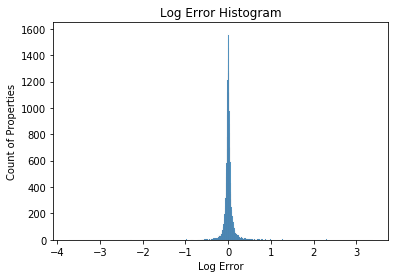

In [25]:
# distribution of log error, to help determine baseline along with stats
plt.title('Log Error Histogram')
plt.xlabel('Log Error')
plt.ylabel('Count of Properties')
sns.histplot(train.log_error)

### Log error is normally distributed, will create baseline as the average

In [37]:
# setting baseline to average log_error
baseline = train.log_error.mean()

# calculating MSE with y_train (actual) and baseline (extended to same size as df)
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

print('The Baseline Mean Squared Error:', round(baseline_mse,5))
print('The Baseline Root Mean Squared Error:', round(baseline_rmse,5))

The Baseline Mean Squared Error: 0.02841
The Baseline Root Mean Squared Error: 0.01421


### Mean Squared Error and Root Mean Squared Error Review - [Skip](#next-bullet)
MSE
- how close a fitted line is to data points
- squared so negative values do not cancel positive values
- smaller value means the closer the fit

RMSE  

- just the square root of the MSE
- standard deviation of predicted value to actual value for each observation
- how close the data is concentrated around the prediction
![](https://www.statisticshowto.com/wp-content/uploads/2015/03/residual.png)

###### "What are Mean Squared Error and Root Mean Squared Error?" From Vernier.com https://www.vernier.com/til/1014

###### Stephanie Glen. "RMSE: Root Mean Square Error" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/

## Creating Models on Train

### Model 1 <a class="anchor" id="next-bullet"></a>

### Model 2

### Model 3

### Model 4

## Are Models Overfit? Checking with Validate

## Simulating Future, Unseen Data - Best Model on Test

### Takeaways
- Baseline performance
- Best model performance
- What this means?

#### Jump To:
[Acquire](#first-bullet),  [Prepare](#second-bullet),  [Explore](#third-bullet),  [Modeling](#fourth-bullet),  [Conclusions](#fifth-bullet)  

# Conclusions <a class="anchor" id="fifth-bullet"></a>